In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from settings import PROJECT_PATH, FOR_THESIS_DIR
import comet_ml
import json
import re

# Get credentials

In [2]:
with open(f"{PROJECT_PATH}/data/credentials/comet.json", 'r') as f:
    credentials = json.load(f)

api_key = credentials['api_key']
project_name = credentials['project_name']
workspace = credentials['workspace']

In [3]:
comet_api = comet_ml.API(rest_api_key=api_key)

COMET WARNING: rest_api_key has been deprecated; please use api_key instead


# Get one eye experiment data

In [4]:
exp = comet_api.get("lukaszsus/gaze-estimation/962448d750844c33a32890118dd1e4ab")

In [5]:
dir(exp)

['_ATTR_FIELD_MAP',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_check_results',
 '_get_experiment_url',
 '_in_jupyter_environment',
 '_set_from_metadata',
 '_update_from_metadata',
 'add_tags',
 'archive',
 'archived',
 'create_symlink',
 'delete_asset',
 'display',
 'download_model',
 'duration_millis',
 'end',
 'end_server_timestamp',
 'file_name',
 'file_path',
 'get_additional_system_info',
 'get_asset',
 'get_asset_list',
 'get_code',
 'get_command',
 'get_curves',
 'get_environment_details',
 'get_executable',
 'get_git_metadata',
 'get_git_patch',
 'get_gpu_static_info',
 'get_hostname',
 'get_html',
 'get_installed_packages',
 'get_ip',
 'get_mac

In [6]:
df_metrics = pd.DataFrame(exp.get_metrics())

In [7]:
df_metrics = df_metrics.astype({"metricValue": float, "timestamp": int, "step": float,
                               "epoch": float, "offset": int})

### Błąd kątowy w zależności od epoki uczenia

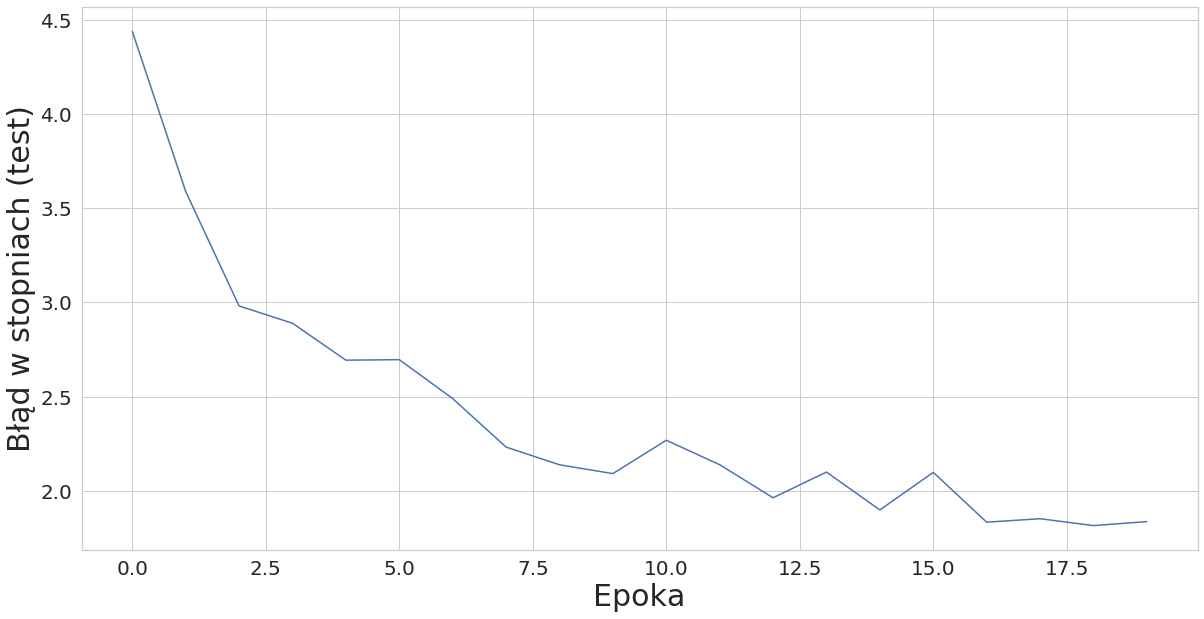

In [8]:
df_angle_error_degrees = df_metrics[df_metrics["metricName"] == "angle_error_degrees"]
df_angle_error_degrees = df_angle_error_degrees.rename({"metricValue": "Błąd w stopniach", "epoch": "Epoka"}, 
                                                      axis=1)
fig = plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.lineplot(data=df_angle_error_degrees, y="Błąd w stopniach", x="Epoka")
ax.set_xlabel("Epoka", fontsize=30)
ax.set_ylabel("Błąd w stopniach (test)", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig(os.path.join(FOR_THESIS_DIR, 'one_eye_p00_angle_error.png'), bbox_inches='tight')

# One eye all together

In [9]:
exp = comet_api.get("lukaszsus/gaze-estimation/9aefbe8e65e8459c86c4be6f1148bfbf")

In [10]:
df_params = pd.DataFrame(exp.get_parameters_summary())
df_params

,name,valueMax,valueMin,valueCurrent,timestampMax,timestampMin,timestampCurrent,stepMax,stepMin,stepCurrent
0,Adam_amsgrad,false,false,false,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
1,Adam_beta_1,0.9,0.9,0.9,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
2,Adam_beta_2,0.999,0.999,0.999,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
3,Adam_decay,0.0,0.0,0.0,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
4,Adam_epsilon,1.0E-7,1.0E-7,1.0E-7,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
5,Adam_learning_rate,0.001,0.001,0.001,1579452973470,1579452973470,1579452973470,NaN,NaN,NaN
6,conv_sizes,"[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[{""n_filters"":16,""filter_size"":[3,3],""padding""...",1579452973469,1579452973469,1579452973469,NaN,NaN,NaN
7,curr_epoch,29,29,29,1579453028293,1579453028293,1579453028293,28.0,28.0,28.0
8,curr_step,29,29,29,1579453028293,1579453028293,1579453028293,29.0,29.0,29.0
9,data_set_dataset_size,3000 per subject,3000 per subject,3000 per subject,1579452973468,1579452973468,1579452973468,NaN,NaN,NaN


In [11]:
df_metrics = pd.DataFrame(exp.get_metrics())

In [12]:
df_metrics["metricName"].unique()

array(['train_mean_squared_error', 'sys.gpu.0.gpu_utilization',
       'test_loss', 'test_mae_1', 'train_mae_1',
       'test_mean_absolute_error', 'train_loss',
       'train_mean_absolute_error', 'test_angle_error_degrees',
       'sys.gpu.0.total_memory', 'sys.gpu.0.free_memory', 'test_mae_0',
       'sys.gpu.0.used_memory', 'test_mean_squared_error', 'train_mae_0'],
      dtype=object)

In [13]:
df_metrics = df_metrics.astype({"metricValue": float, "timestamp": int, "step": float,
                               "epoch": float, "offset": int})

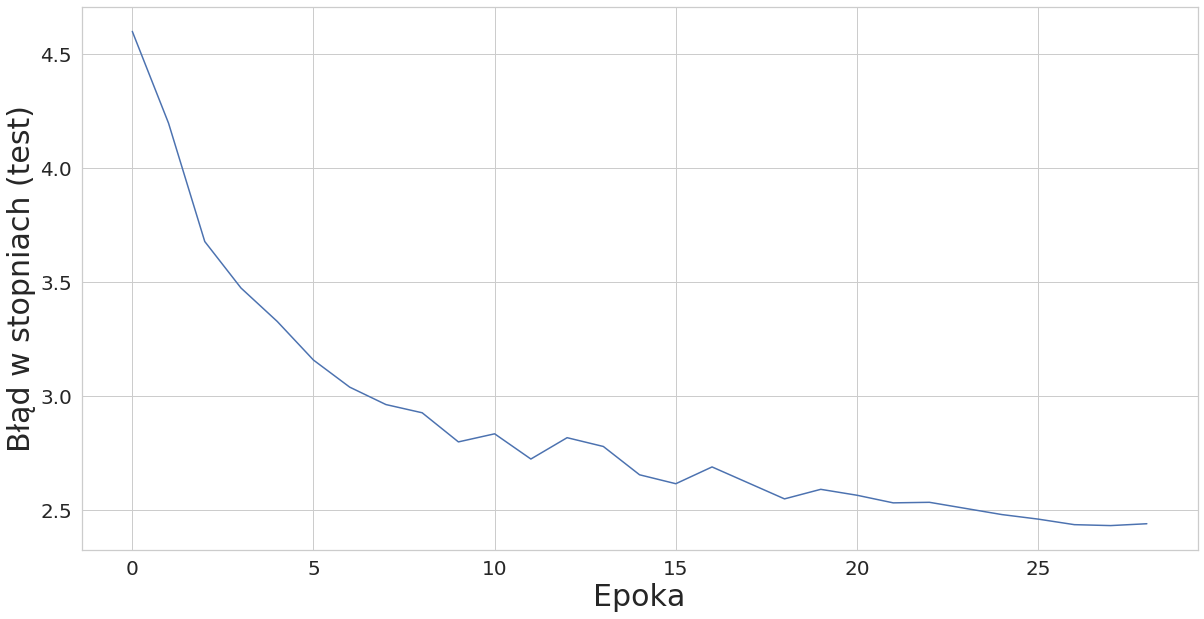

In [14]:
df_angle_error_degrees = df_metrics[df_metrics["metricName"] == "test_angle_error_degrees"]
df_angle_error_degrees = df_angle_error_degrees.rename({"metricValue": "Błąd w stopniach", "epoch": "Epoka"}, 
                                                      axis=1)
fig = plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.lineplot(data=df_angle_error_degrees, y="Błąd w stopniach", x="Epoka")
ax.set_xlabel("Epoka", fontsize=30)
ax.set_ylabel("Błąd w stopniach (test)", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.savefig(os.path.join(FOR_THESIS_DIR, 'one_eye_all_together_angle_error.png'), bbox_inches='tight')

In [15]:
def bar_plot_per_person(df):
    df = df[["person_id", "test_mean_absolute_error", "angle_error_degrees"]]
    df = df.dropna()
    df = df.astype({"person_id": int, "test_mean_absolute_error": float, "angle_error_degrees": float})
    df = df.groupby(["person_id"]).min()
    df = df.reset_index()
    
    df = df[["person_id", "angle_error_degrees"]]
    df = df.rename({"person_id": "Id osoby", "angle_error_degrees": "Błąd w stopniach"},
                                                        axis=1)
    mean = np.mean(df["Błąd w stopniach"].values)
    df = df.append([{"Id osoby": "średnia", "Błąd w stopniach": mean}], ignore_index=True)
    df = df.round({"Błąd w stopniach": 2})
    
    plt.figure(figsize=(20, 10))
    sns.set(style="whitegrid")
    ax = sns.barplot(x="Id osoby", y="Błąd w stopniach", data=df.iloc[:-1, :])
    ax.set_xlabel("Id osoby", fontsize=30)
    ax.set_ylabel("Błąd w stopniach", fontsize=30)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.savefig(os.path.join(FOR_THESIS_DIR, 'one_eye_separately.png'), bbox_inches='tight')
    
    return df

# Both eyes coords

In [16]:
exp = comet_api.get("lukaszsus/gaze-estimation/5d11c87f245942978cf10187c4b8aef2")

In [17]:
df_params = pd.DataFrame(exp.get_parameters_summary())
df_params

,name,valueMax,valueMin,valueCurrent,timestampMax,timestampMin,timestampCurrent,stepMax,stepMin,stepCurrent
0,Adam_amsgrad,false,false,false,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
1,Adam_beta_1,0.9,0.9,0.9,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
2,Adam_beta_2,0.999,0.999,0.999,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
3,Adam_decay,0.0,0.0,0.0,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
4,Adam_epsilon,1.0E-7,1.0E-7,1.0E-7,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
5,Adam_learning_rate,0.001,0.001,0.001,1588611578473,1588611578473,1588611578473,NaN,NaN,NaN
6,conv_sizes,"[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[{""n_filters"":16,""filter_size"":[3,3],""padding""...",1588611578470,1588611578470,1588611578470,NaN,NaN,NaN
7,curr_epoch,29,29,29,1588611702513,1588611702513,1588611702513,28.0,28.0,28.0
8,curr_step,29,29,29,1588611702513,1588611702513,1588611702513,29.0,29.0,29.0
9,data_set_dataset_size,3000 per subject,3000 per subject,3000 per subject,1588611578468,1588611578468,1588611578468,NaN,NaN,NaN


In [18]:
conv_sizes = json.loads(df_params.loc[6, "valueMax"])

In [19]:
conv_sizes

[{'n_filters': 16,
  'filter_size': [3, 3],
  'padding': 'valid',
  'stride': [1, 1],
  'pool': 'avg',
  'pool_size': [2, 2],
  'pool_stride': [2, 2]},
 {'n_filters': 16,
  'filter_size': [3, 3],
  'padding': 'valid',
  'stride': [1, 1],
  'pool': None,
  'pool_size': None,
  'pool_stride': None},
 {'n_filters': 16,
  'filter_size': [3, 3],
  'padding': 'valid',
  'stride': [1, 1],
  'pool': 'avg',
  'pool_size': [2, 2],
  'pool_stride': [2, 2]}]

# Own dataset + mpii gaze

In [20]:
exp = comet_api.get("lukaszsus/gaze-estimation/c3f1740ed9204251afeff55f0302b5b4")

In [21]:
exp.get_metrics()

[{'metricName': 'train_mean_squared_error',
  'metricValue': '0.04934766888618469',
  'timestamp': 1589925000261,
  'step': 0,
  'epoch': 0,
  'runContext': None,
  'offset': 74},
 {'metricName': 'train_mean_squared_error',
  'metricValue': '0.025870203971862793',
  'timestamp': 1589925004681,
  'step': 1,
  'epoch': 1,
  'runContext': None,
  'offset': 114},
 {'metricName': 'train_mean_squared_error',
  'metricValue': '0.02097380720078945',
  'timestamp': 1589925008827,
  'step': 2,
  'epoch': 2,
  'runContext': None,
  'offset': 154},
 {'metricName': 'train_mean_squared_error',
  'metricValue': '0.018016234040260315',
  'timestamp': 1589925013069,
  'step': 3,
  'epoch': 3,
  'runContext': None,
  'offset': 194},
 {'metricName': 'train_mean_squared_error',
  'metricValue': '0.015776073560118675',
  'timestamp': 1589925016841,
  'step': 4,
  'epoch': 4,
  'runContext': None,
  'offset': 230},
 {'metricName': 'train_mean_squared_error',
  'metricValue': '0.014106476679444313',
  'times

In [22]:
exp.name

'own_dataset_mpii_gaze'

# For thesis

# First trial - MPII Gaze + one person from own dataset

In [36]:
url = "lukaszsus/gaze-estimation/9065d73b0a9f45c9af35c9c08e31878d"
file_name = "first_own_mpiigaze"

In [37]:
def bar_plot_per_person_coords(df_metrics_exp, file_name: str):
    mask = np.char.startswith(df_metrics_exp["name"].unique().astype(str), "test_mae_person_")
    prog = re.compile("test_mae_person_(\d+)")
    people_ids = list()
    for index, row in df_metrics_exp[mask].iterrows():
        result = prog.match(row["name"])
        person_id_str = result.group(1)
        person_id = int(person_id_str)
        people_ids.append(person_id)
    people_ids.sort()

    y = list()
    for person_id in people_ids:
        row = df_metrics_exp[df_metrics_exp["name"] == f"test_mae_person_{person_id}"]
        y.append(row["valueCurrent"].values[0])
        
    plt.figure(figsize=(20, 10))
    sns.set(style="whitegrid")
    ax = sns.barplot(x=people_ids, y=y)
    ax.set_xlabel("Id osoby", fontsize=30)
    ax.set_ylabel("MAE", fontsize=30)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    
    plt.savefig(os.path.join(FOR_THESIS_DIR, file_name), bbox_inches='tight')
    
    df_error_per_person = pd.DataFrame({"Id osoby": people_ids, "MAE": y})
    return df_error_per_person

In [40]:
def generate_df_plot_error_per_person(url, file_name):
    exp = comet_api.get(url)
    df_metrics_exp = pd.DataFrame(exp.get_metrics_summary())
    df_metrics_exp = df_metrics_exp.astype({"valueMax": float,
                                       "valueMin": float,
                                       "valueCurrent": float})
    
    df_error_per_person = bar_plot_per_person_coords(df_metrics_exp, file_name + ".png")
    mean = np.mean(df_error_per_person["MAE"].values)
    df_error_per_person = df_error_per_person.append([{"Id osoby": "średnia", "MAE": mean}], ignore_index=True)
    df_error_per_person = df_error_per_person.round({"MAE": 4})
    df_error_per_person
    
    latex = df_error_per_person.to_latex(index=False).replace(".", ",")
    with open(os.path.join(FOR_THESIS_DIR, file_name + ".txt"), 'w') as file:
        file.write(latex)
        
    return df_error_per_person

,Id osoby,MAE
0,0,0.0497
1,1,0.0589
2,2,0.0492
3,3,0.0684
4,4,0.0517
5,5,0.0530
6,6,0.0603
7,8,0.0868
8,9,0.0740
9,10,0.0628


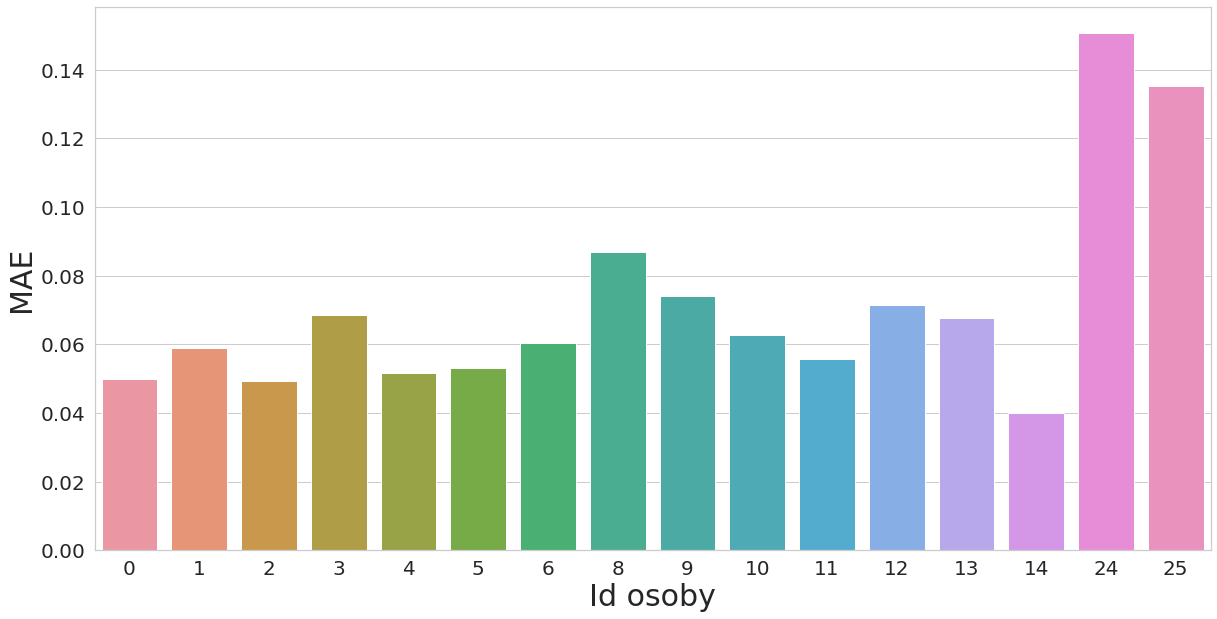

In [41]:
generate_df_plot_error_per_person(url, file_name)

# MPII Face Gaze

,Id osoby,MAE
0,0,0.0484
1,1,0.0570
2,2,0.0526
3,3,0.0667
4,4,0.0525
5,5,0.0538
6,6,0.0598
7,8,0.0867
8,9,0.0761
9,10,0.0701


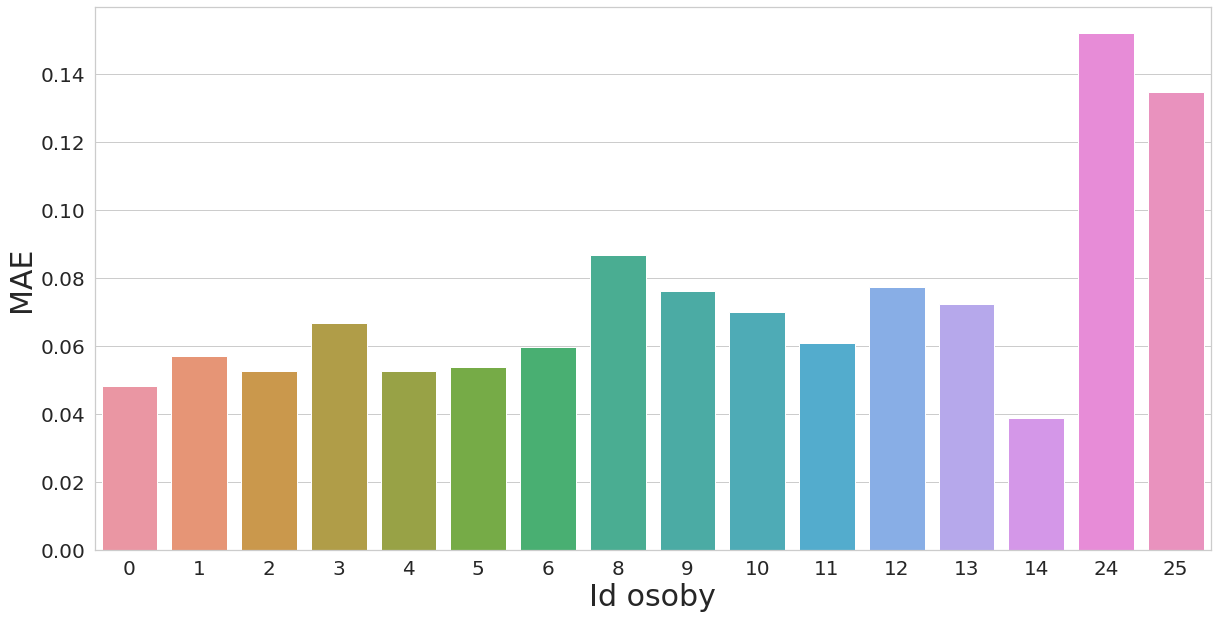

In [45]:
url = "lukaszsus/gaze-estimation/23b8824dec014f6fb3bc8e0cd97060c7"
file_name = "mpii_face_gaze_mean_camera_matrix"
generate_df_plot_error_per_person(url, file_name)

,Id osoby,MAE
0,0,0.0520
1,1,0.0571
2,2,0.0522
3,3,0.0645
4,4,0.0514
5,5,0.0544
6,6,0.0636
7,8,0.0860
8,9,0.0748
9,10,0.0591


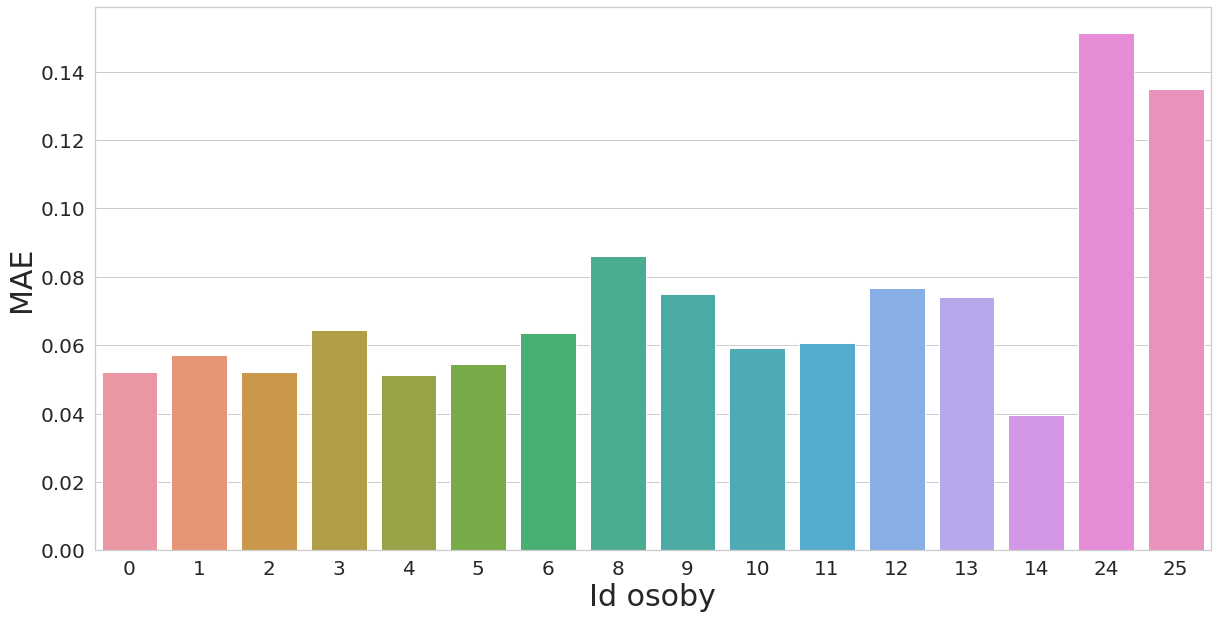

In [46]:
url = "lukaszsus/gaze-estimation/45e2e5ab67f34b3993bfb1abd7d5fadf"
file_name = "mpii_face_gaze_dedicated_camera_matrix"
generate_df_plot_error_per_person(url, file_name)

# MPII Face Gaze dedicated camera matrix - just for sure

,Id osoby,MAE
0,0,0.0486
1,1,0.0588
2,2,0.0490
3,3,0.0650
4,4,0.0489
5,5,0.0507
6,6,0.0610
7,8,0.0869
8,9,0.0788
9,10,0.0620


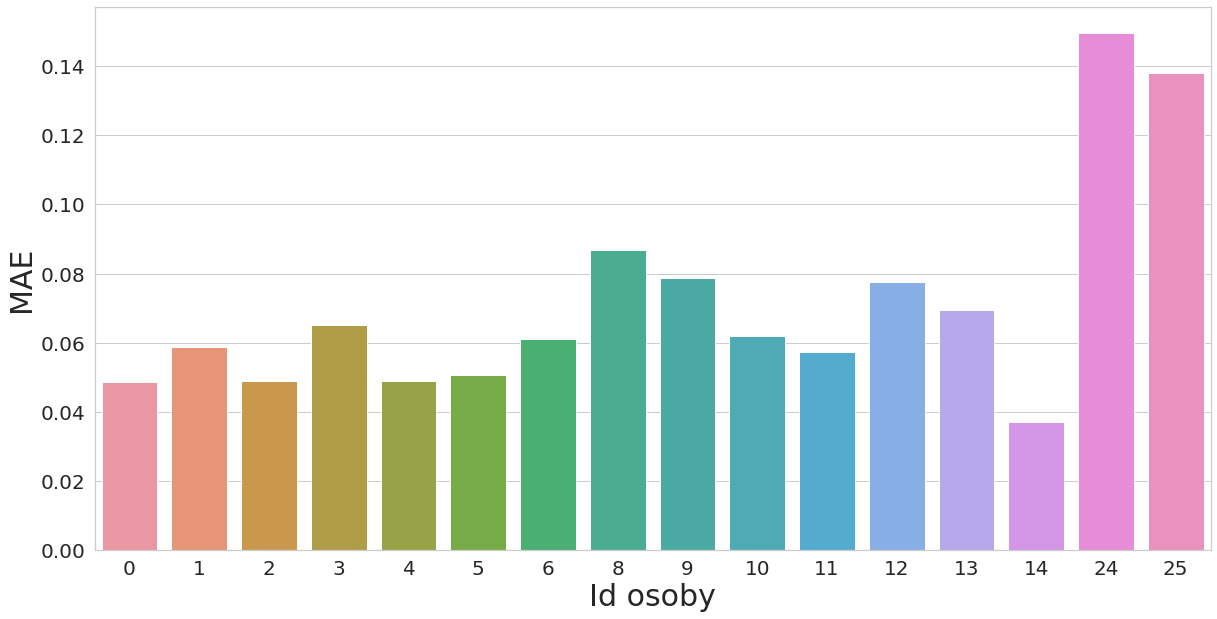

In [50]:
url = "lukaszsus/gaze-estimation/2aac1aae00f148ab959eb3097ef874da"
file_name = "mpii_face_gaze_dedicated_camera_matrix_2"
generate_df_plot_error_per_person(url, file_name)

# Own dataset one person

In [65]:
url = "lukaszsus/gaze-estimation/0ce1f7caae8249f7949a03477a4d509a"
file_name = "own_dataset_one_person"
exp = comet_api.get(url)

In [66]:
df_metrics_exp = pd.DataFrame(exp.get_metrics())

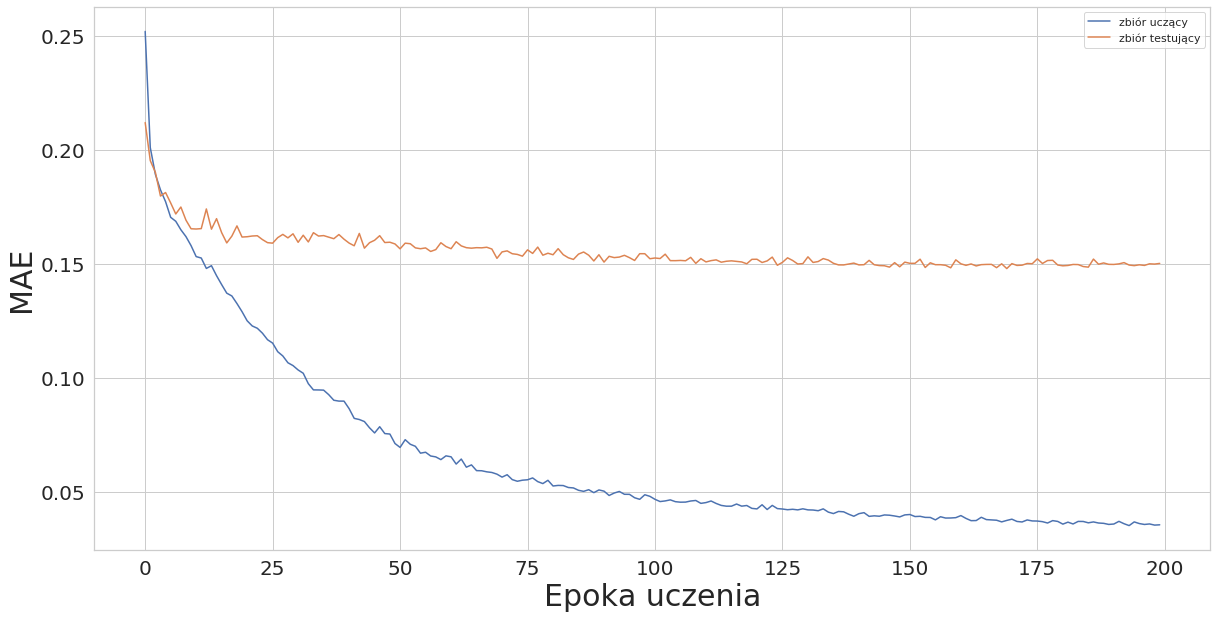

In [67]:
mae_train = df_metrics_exp[df_metrics_exp["metricName"] == "train_mean_absolute_error"]
mae_train = mae_train["metricValue"].values.astype(float)
mae_test = df_metrics_exp[df_metrics_exp["metricName"] == "test_mean_absolute_error"]
epochs = mae_test["epoch"].values.astype(int)
mae_test = mae_test["metricValue"].values.astype(float)

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.lineplot(x=epochs, y=mae_train, label="zbiór uczący")
ax = sns.lineplot(x=epochs, y=mae_test, label="zbiór testujący")
ax.set_xlabel("Epoka uczenia", fontsize=30)
ax.set_ylabel("MAE", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.savefig(os.path.join(FOR_THESIS_DIR, file_name), bbox_inches='tight')

# Own dataset full

,Id osoby,MAE
0,24,0.1595
1,25,0.1391
2,30,0.2320
3,31,0.0577
4,32,0.1168
5,33,0.0969
6,34,0.1936
7,35,0.1568
8,średnia,0.1441


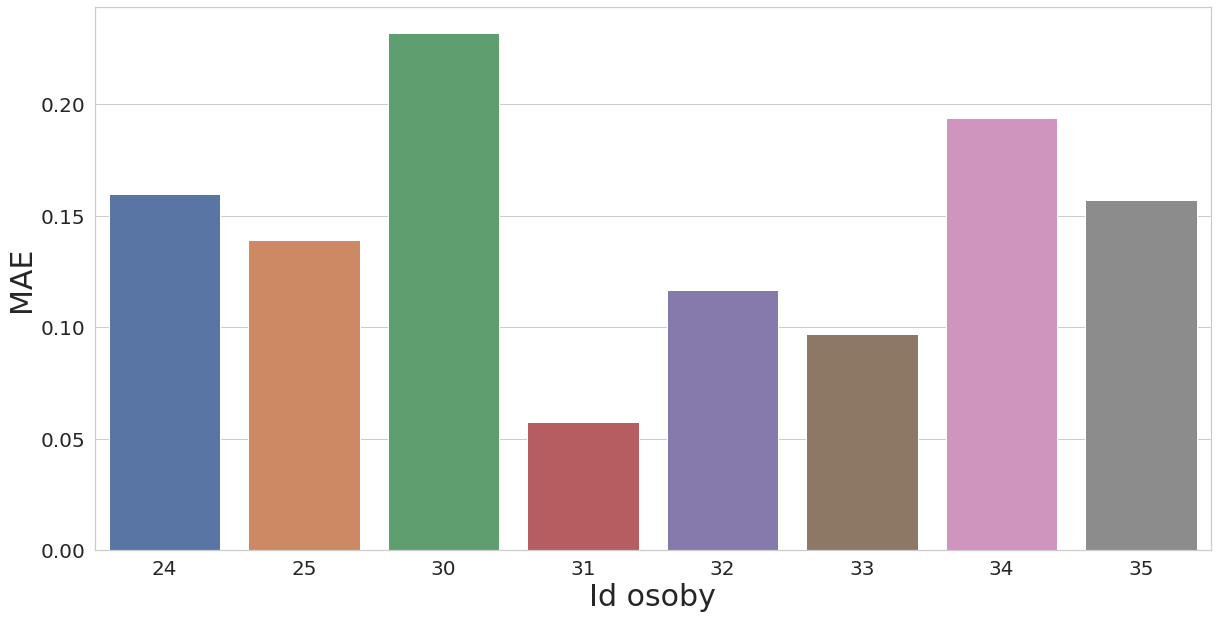

In [68]:
url = "lukaszsus/gaze-estimation/146798ead8084e6d9a8be18793843062"
file_name = "own_dataset_full"
generate_df_plot_error_per_person(url, file_name)

# MPII Gaze + Own Dataset - train, val, test split

In [102]:
url = "lukaszsus/gaze-estimation/57a3db3d8ce54072a599d28f414bb4af"
file_name = "mpiigaze_own_train_val"
exp = comet_api.get(url)

In [103]:
df_metrics_exp = pd.DataFrame(exp.get_metrics())

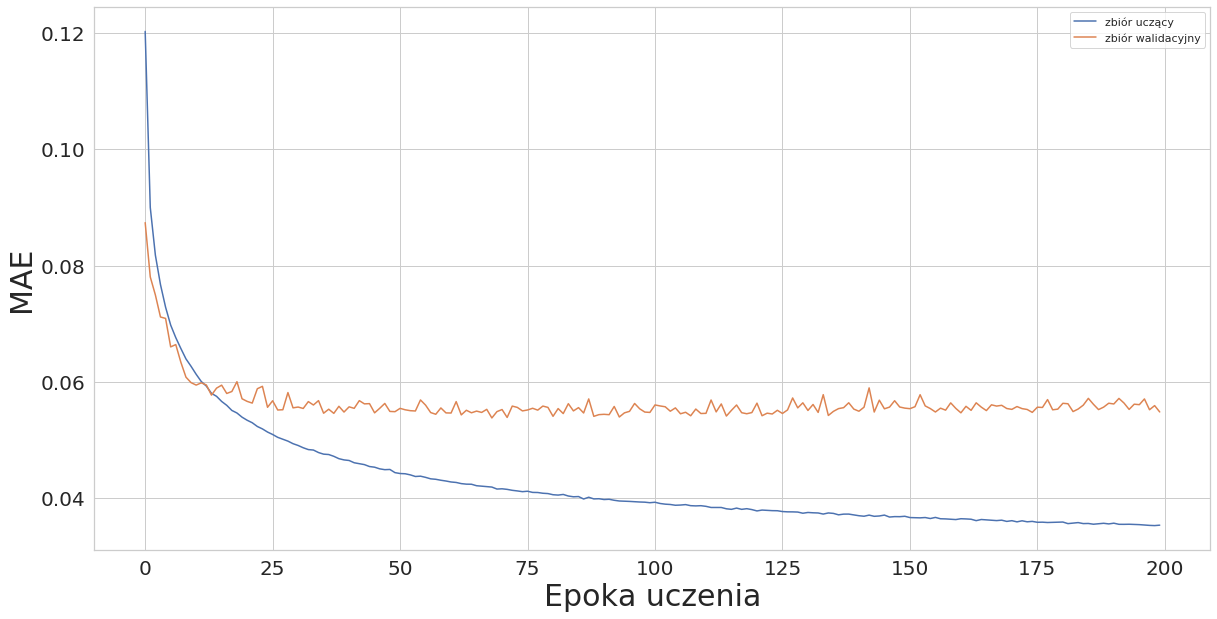

In [104]:
mae_train = df_metrics_exp[df_metrics_exp["metricName"] == "train_mean_absolute_error"]
mae_train = mae_train["metricValue"].values.astype(float)
mae_test = df_metrics_exp[df_metrics_exp["metricName"] == "test_mean_absolute_error"]
epochs = mae_test["epoch"].values.astype(int)
mae_test = mae_test["metricValue"].values.astype(float)

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.lineplot(x=epochs, y=mae_train, label="zbiór uczący")
ax = sns.lineplot(x=epochs, y=mae_test, label="zbiór walidacyjny")
ax.set_xlabel("Epoka uczenia", fontsize=30)
ax.set_ylabel("MAE", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.savefig(os.path.join(FOR_THESIS_DIR, file_name), bbox_inches='tight')

In [105]:
url = "lukaszsus/gaze-estimation/4b0b7b98ccda4839850b1bed2f2e9c9e"
file_name = "mpiigaze_own_500_train_val"
exp = comet_api.get(url)

In [106]:
df_metrics_exp = pd.DataFrame(exp.get_metrics())

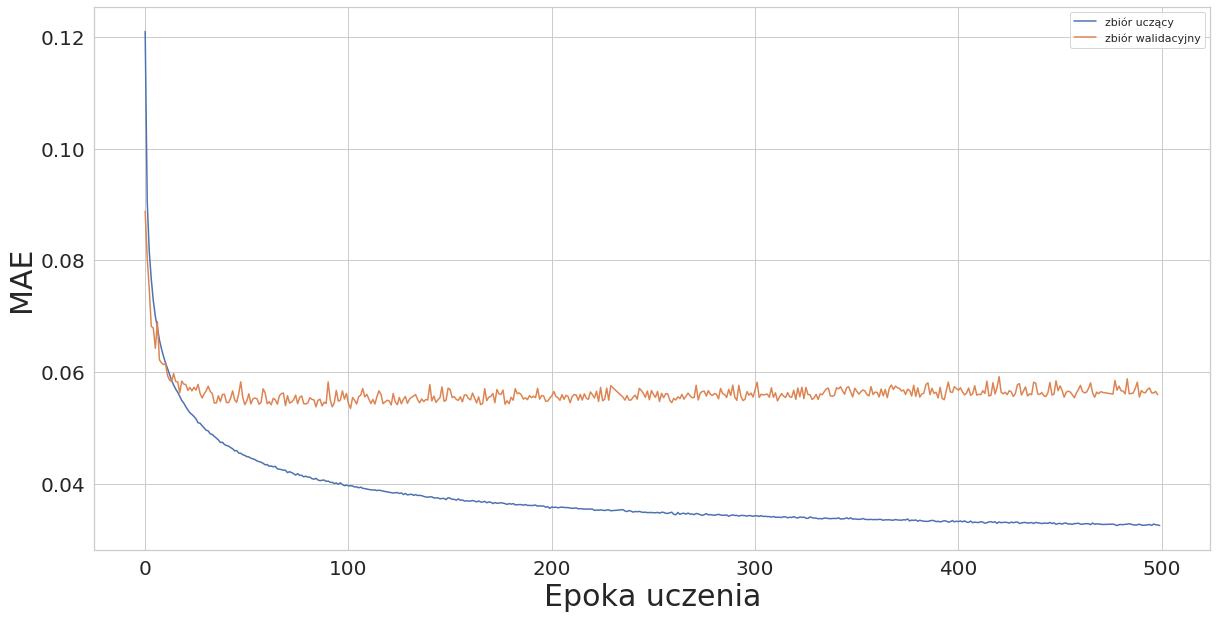

In [107]:
mae_train = df_metrics_exp[df_metrics_exp["metricName"] == "train_mean_absolute_error"]
epochs = mae_train["epoch"].values.astype(int)
mae_train = mae_train["metricValue"].values.astype(float)
mae_test = df_metrics_exp[df_metrics_exp["metricName"] == "test_mean_absolute_error"]
mae_test = mae_test["metricValue"].values.astype(float)

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.lineplot(x=epochs[:len(mae_train)], y=mae_train, label="zbiór uczący")
ax = sns.lineplot(x=epochs[:len(mae_test)], y=mae_test, label="zbiór walidacyjny")
ax.set_xlabel("Epoka uczenia", fontsize=30)
ax.set_ylabel("MAE", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.savefig(os.path.join(FOR_THESIS_DIR, file_name), bbox_inches='tight')

In [108]:
file_name = "mpiigaze_own_500_train_val_mse"

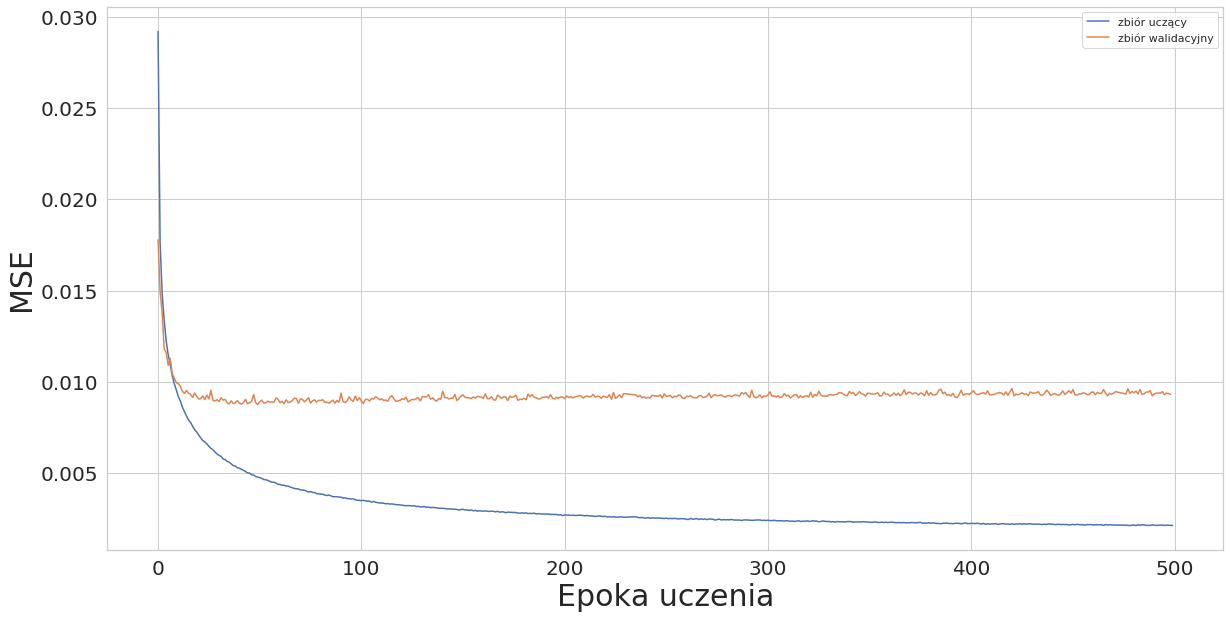

In [109]:
mse_train = df_metrics_exp[df_metrics_exp["metricName"] == "train_mean_squared_error"]
epochs = mse_train["epoch"].values.astype(int)
mse_train = mse_train["metricValue"].values.astype(float)
mse_test = df_metrics_exp[df_metrics_exp["metricName"] == "test_mean_squared_error"]
mse_test = mse_test["metricValue"].values.astype(float)

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
ax = sns.lineplot(x=epochs[:len(mse_train)], y=mse_train, label="zbiór uczący")
ax = sns.lineplot(x=epochs[:len(mse_test)], y=mse_test, label="zbiór walidacyjny")
ax.set_xlabel("Epoka uczenia", fontsize=30)
ax.set_ylabel("MSE", fontsize=30)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.savefig(os.path.join(FOR_THESIS_DIR, file_name), bbox_inches='tight')

,Id osoby,MAE
0,0,0.0345
1,1,0.0375
2,2,0.0385
3,3,0.0497
4,4,0.0408
5,5,0.0469
6,6,0.0475
7,8,0.0836
8,9,0.0607
9,10,0.0623


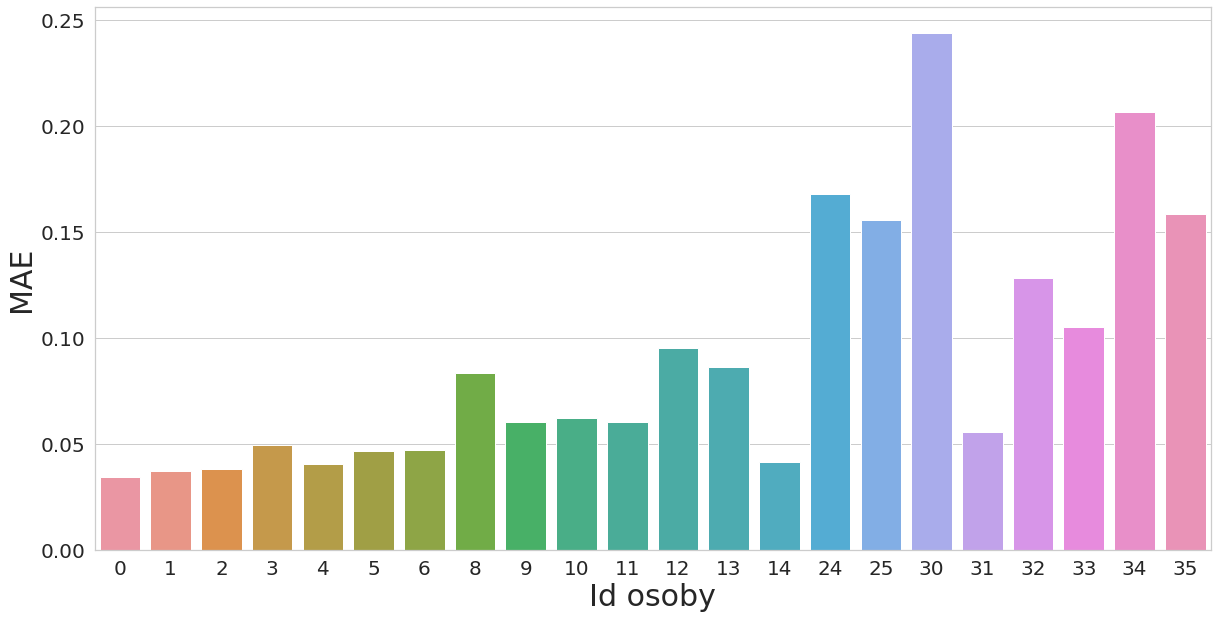

In [110]:
url = "lukaszsus/gaze-estimation/391f1da9f2dc4caca720f7a082fe376a"
file_name = "own_dataset_mpiigaze_test_500"
generate_df_plot_error_per_person(url, file_name)

,Id osoby,MAE
0,0,0.0342
1,1,0.0372
2,2,0.0367
3,3,0.0487
4,4,0.0389
5,5,0.0463
6,6,0.0471
7,8,0.0829
8,9,0.0595
9,10,0.0567


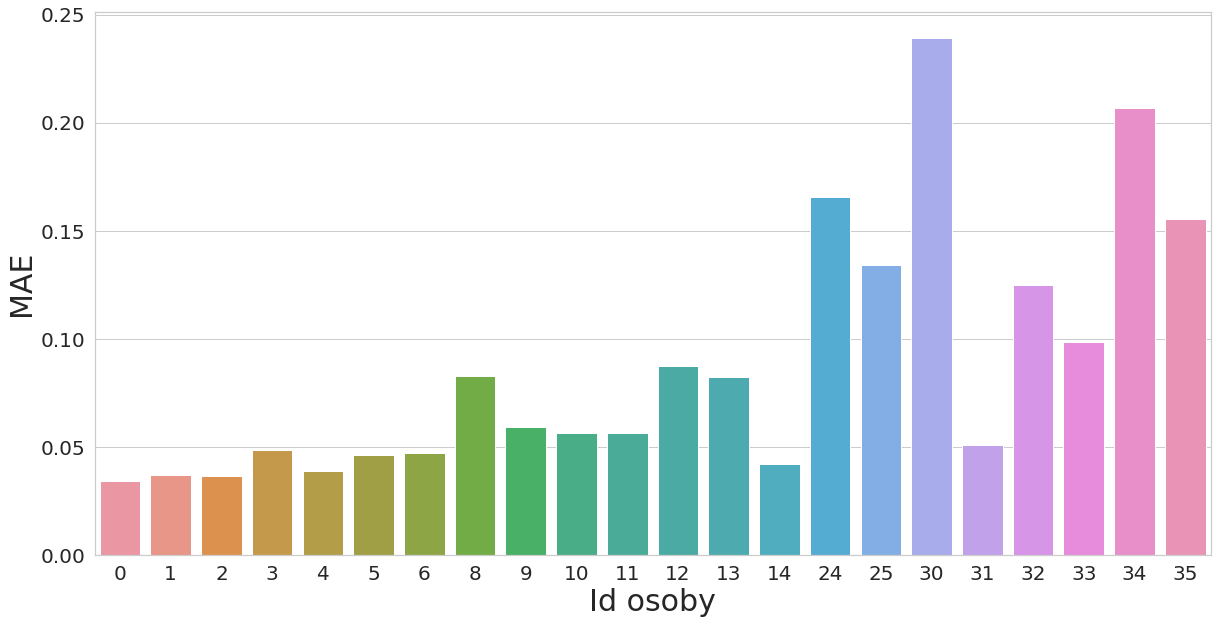

In [111]:
url = "lukaszsus/gaze-estimation/29138658e05a4453ae325f78a9b3d97f"
file_name = "own_dataset_mpiigaze_test_200"
generate_df_plot_error_per_person(url, file_name)